# ADITYA DUTTA, aditya-dutta213, 5126-4191-24

## HW 7 

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re,random
from sklearn import svm
import warnings
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,hamming_loss
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

 **1. (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics. uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the dat 
 randomly as the training se**. 

In [4]:
file_path = '../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv'

anuran_data = pd.read_csv(file_path, sep=',', skiprows=0)
anuran_data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [5]:
anuran_data.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


In [6]:
# Counting data in each differnt value in Family
anuran_data.groupby(['Family']).agg({'Family': ['count']}).reset_index()

Family      
                   count
0        Bufonidae    68
1    Dendrobatidae   542
2          Hylidae  2165
3  Leptodactylidae  4420

In [7]:
# Counting data in each differnt value in Genus 
anuran_data.groupby(['Genus']).agg({'Genus': ['count']}).reset_index()

Genus      
                 count
0      Adenomera  4150
1       Ameerega   542
2  Dendropsophus   310
3      Hypsiboas  1593
4  Leptodactylus   270
5  Osteocephalus   114
6       Rhinella    68
7         Scinax   148

In [8]:
# Counting data in each differnt value in Species
anuran_data.groupby(['Species']).agg({'Species': ['count']}).reset_index()

Species      
                          count
0          AdenomeraAndre   672
1  AdenomeraHylaedactylus  3478
2      Ameeregatrivittata   542
3              HylaMinuta   310
4    HypsiboasCinerascens   472
5       HypsiboasCordobae  1121
6     LeptodactylusFuscus   270
7   OsteocephalusOophagus   114
8       Rhinellagranulosa    68
9             ScinaxRuber   148

In [9]:
anuran_data.groupby(['Family', 'Genus', 'Species']).agg({
    'Family': ['count'],
    'Genus': ['count'],
    'Species': ['count']
}).reset_index()

,Family,Genus,Species,Family,Genus,Species
,,,,count,count,count
0,Bufonidae,Rhinella,Rhinellagranulosa,68,68,68
1,Dendrobatidae,Ameerega,Ameeregatrivittata,542,542,542
2,Hylidae,Dendropsophus,HylaMinuta,310,310,310
3,Hylidae,Hypsiboas,HypsiboasCinerascens,472,472,472
4,Hylidae,Hypsiboas,HypsiboasCordobae,1121,1121,1121
5,Hylidae,Osteocephalus,OsteocephalusOophagus,114,114,114
6,Hylidae,Scinax,ScinaxRuber,148,148,148
7,Leptodactylidae,Adenomera,AdenomeraAndre,672,672,672
8,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,3478,3478,3478


## Now to select 70% of the data randomly as the training set

In [10]:
# 70% size of the training data and randomstate 50, ranmdom split
train_anuran, test_anuran = train_test_split(anuran_data, train_size=0.7, random_state=50)
train_anuran = train_anuran.iloc[:, :-1]
train_anuran

# Break train data into separate label columns for multilabel prob
features_x = train_anuran.iloc[:, :-3]
labels_y_Family = train_anuran.iloc[:, -3]
labels_y_Genus = train_anuran.iloc[:, -2]
labels_y_Species = train_anuran.iloc[:, -1]


In [11]:
test_anuran = test_anuran.iloc[:, :-1]
test_anuran

# Break test data into separate label columns for the multilabel prob
features_test_x = test_anuran.iloc[:, :-3]
labels_test_y_Family = test_anuran.iloc[:, -3]
labels_test_y_Genus = test_anuran.iloc[:, -2]
labels_test_y_Species = test_anuran.iloc[:, -1]


**1. (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:**

**1. (b) i. Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.**

### Implementation of the Exact Match Score and Hamming Score/Loss methods for evaluating multi label classification

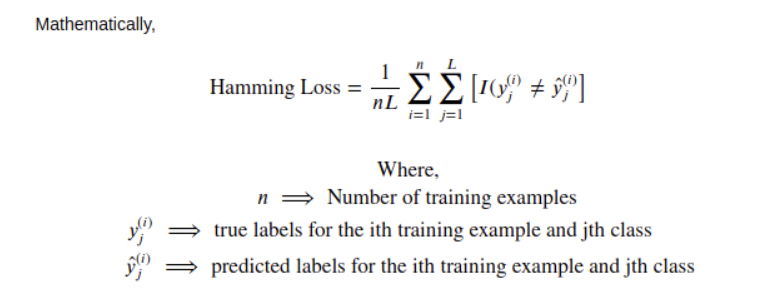

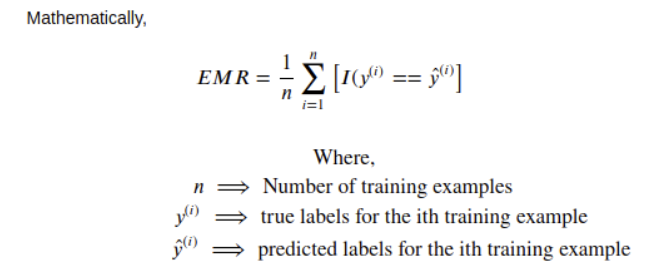

In [10]:
# Exact match score and hamming score functions
# Useful Link: https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd

def exact_match_score(y_actual, y_predicted):
    match_score = np.all(y_predicted == y_actual, axis=1).mean()
    mismatch_loss = np.any(y_actual != y_predicted, axis=1).mean()
    return round(match_score, 4), round(mismatch_loss, 4)

def hamming_loss_custom(y_actual, y_predicted):
    mismatch_count = 0
    for index in range(y_actual.shape[0]):
        total_labels = np.size(y_actual.iloc[index] == y_predicted.iloc[index])
        matched_labels = np.count_nonzero(y_actual.iloc[index] == y_predicted.iloc[index])
        mismatch_count += total_labels - matched_labels
    hamming_loss_value = mismatch_count / (y_actual.shape[0] * y_actual.shape[1])
    return round(hamming_loss_value, 4)


**1. (b) ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.**

### Implementing without standardizing the data

In [11]:
# Useful LInks: 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Prompt used: "How can I use GridSearchCV to optimize an SVM model's hyperparameters effectively?", 
# (5 lines), GPT-Generated
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# model = SVC()
# param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
# grid_search.fit(features_train, labels_train)
# print("Best Parameters:", grid_search.best_params_)

def svm_classifier(features_train, labels_train, features_test, labels_test, model, hyperparameters):
    
    # Fit GridSearchCV 
    parameter_search = GridSearchCV(estimator=model, **hyperparameters)
    
    parameter_search.fit(features_train, labels_train)
    
    print("CV Score (Mean), CV Score (Std) for Parameters")
    
    for idx in range(len(parameter_search.cv_results_['params'])):
        print('Mean Score:', round(parameter_search.cv_results_['mean_test_score'][idx], 4),
              'with Std.:', round(parameter_search.cv_results_['std_test_score'][idx], 4),
              'for parameters:', parameter_search.cv_results_['params'][idx])
    
    print('\nBest Parameters: ', parameter_search.best_params_)
    predictions_test = parameter_search.predict(features_test)
    
    print('Test Classification Report: \n', classification_report(labels_test, predictions_test))
    
    return parameter_search, predictions_test

In [12]:
hyperparameter_grid = {
    'C': np.logspace(-3, 6, 10),
    'gamma': np.round(np.linspace(0.1, 2.1, 11), 3),
    'degree': [1],
    'kernel': ['rbf']
}

cross_validator = StratifiedKFold(10, random_state=50, shuffle=True)

grid_settings = {
    'param_grid': hyperparameter_grid,
    'cv': cross_validator,
    'scoring': 'f1_weighted',
    'verbose': 1
}


##### For Family Label

In [13]:
# Classifier for family label
svm_classifier_out_family, predicted_labels_family = svm_classifier(
    features_train, labels_y_Family, features_test, labels_test_y_Family, SVC(), grid_settings
)

Fitting 10 folds for each of 110 candidates, totalling 1100 fits
 CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.3, 'kernel': 'rbf'}
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.7, 'kernel': 'rbf'}
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.9, 'kernel': 'rbf'}
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.1, 'kernel': 'rbf'}
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.3, 'kernel': 'rbf'}
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.5, 'kernel'

##### For Genus Label

In [14]:
# Classifier for Genus label
svm_classifier_out_genus, predicted_labels_genus = svm_classifier(
    features_train, labels_y_Genus, features_test, labels_test_y_Genus, SVC(), grid_settings
)

Fitting 10 folds for each of 110 candidates, totalling 1100 fits
 CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.3, 'kernel': 'rbf'}
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.7, 'kernel': 'rbf'}
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.9, 'kernel': 'rbf'}
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.1, 'kernel': 'rbf'}
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.3, 'kernel': 'rbf'}
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.5, 'kernel'

##### For Species Label

In [15]:
# Classifier for species label
svm_classifier_out_species, predicted_labels_species = svm_classifier(
    features_train, labels_y_Species, features_test, labels_test_y_Species, SVC(), grid_settings
)

Fitting 10 folds for each of 110 candidates, totalling 1100 fits
 CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.3, 'kernel': 'rbf'}
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.7, 'kernel': 'rbf'}
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.9, 'kernel': 'rbf'}
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.1, 'kernel': 'rbf'}
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.3, 'kernel': 'rbf'}
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.5, 'kernel'

##### Hamming Score and Exact Match Score

In [16]:
# Processing for Hamming scores and exact match scores
actual_labels_test = pd.concat([labels_test_y_Family, labels_test_y_Genus, labels_test_y_Species], axis=1).reset_index()
actual_labels_test = actual_labels_test.iloc[:, 1:]

In [17]:
# More processing
predicted_labels_test = pd.concat([pd.Series(predicted_labels_family), pd.Series(predicted_labels_genus), pd.Series(predicted_labels_species)], axis=1
).reset_index()
predicted_labels_test = predicted_labels_test.iloc[:, 1:]
column_names = ['Family', 'Genus', 'Species']
predicted_labels_test.columns = column_names


In [18]:
# Multi-class and multi-label classification eval
exact_match_score_value, exact_match_loss_value = exact_match_score(actual_labels_test, predicted_labels_test)
hamming_loss_value = hamming_loss_custom(actual_labels_test, predicted_labels_test)

print('Exact Match Score: ', exact_match_score_value)
print('Exact Match Loss: ', exact_match_loss_value)
print('Hamming Loss: ', hamming_loss_value)
print('Hamming Score: ', 1 - hamming_loss_value)


Exact Match Score:  0.9875
Exact Match Loss:  0.0125
Hamming Loss:  0.0094
Hamming Score:  0.9906


### Implementating with standardizing the data

In [19]:
# Standardizing the input data
# Useful Link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

standard_scaler = StandardScaler()
features_train_std = standard_scaler.fit_transform(features_train)
features_test_std = standard_scaler.fit_transform(features_test)

##### For Family Label

In [20]:
# For family label
svm_classifier_out_family_std, predicted_labels_family_std = svm_classifier(
    features_train_std, labels_y_Family, features_test_std, labels_test_y_Family, SVC(), grid_settings
)

Fitting 10 folds for each of 110 candidates, totalling 1100 fits
 CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.3, 'kernel': 'rbf'}
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.7, 'kernel': 'rbf'}
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.9, 'kernel': 'rbf'}
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.1, 'kernel': 'rbf'}
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.3, 'kernel': 'rbf'}
Mean Score: 0.4738  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.5, 'kernel'

##### For Genus Label

In [21]:
# For Genus label
svm_classifier_out_genus_std, predicted_labels_genus_std = svm_classifier(
    features_train_std, labels_y_Genus, features_test_std, labels_test_y_Genus, SVC(), grid_settings
)

Fitting 10 folds for each of 110 candidates, totalling 1100 fits
 CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.3, 'kernel': 'rbf'}
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.7, 'kernel': 'rbf'}
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.9, 'kernel': 'rbf'}
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.1, 'kernel': 'rbf'}
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.3, 'kernel': 'rbf'}
Mean Score: 0.4259  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.5, 'kernel'

##### For Species Label

In [22]:
# For Species label
svm_classifier_out_species_std, predicted_labels_species_std = svm_classifier(
    features_train_std, labels_y_Species, features_test_std, labels_test_y_Species, SVC(), grid_settings
)

Fitting 10 folds for each of 110 candidates, totalling 1100 fits
 CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.3, 'kernel': 'rbf'}
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.7, 'kernel': 'rbf'}
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 0.9, 'kernel': 'rbf'}
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.1, 'kernel': 'rbf'}
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.3, 'kernel': 'rbf'}
Mean Score: 0.3169  with Std.: 0.0008  for parameters: {'C': 0.001, 'degree': 1, 'gamma': 1.5, 'kernel'

In [23]:
# Processing for eval
predicted_labels_test_std = pd.concat(
    [pd.Series(predicted_labels_family_std), pd.Series(predicted_labels_genus_std), pd.Series(predicted_labels_species_std)],
    axis=1
).reset_index()
predicted_labels_test_std = predicted_labels_test_std.iloc[:, 1:]
column_names = ['Family', 'Genus', 'Species']
predicted_labels_test_std.columns = column_names


In [24]:
exact_match_score_value_std, exact_match_loss_value_std = exact_match_score(actual_labels_test, predicted_labels_test_std)
hamming_loss_value_std = hamming_loss_custom(actual_labels_test, predicted_labels_test_std)

print('Exact Match Score: ', exact_match_score_value_std)
print('Exact Match Loss: ', exact_match_loss_value_std)
print('Hamming Loss: ', hamming_loss_value_std)
print('Hamming Score: ', 1 - hamming_loss_value_std)


Exact Match Score:  0.981
Exact Match Loss:  0.019
Hamming Loss:  0.0142
Hamming Score:  0.9858


**1. (b) iii. Repeat 1(b)ii with L1-penalized SVMs with standardized data. Determined the weight of the SVM penalty using 10 fold cross validation.**

In [25]:
# Useful Link: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
linear_svc_params = {'C': np.logspace(-3, 6, 10)}

cross_validator_L1 = StratifiedKFold(10, random_state=50, shuffle=True)

linear_svc_param_grid = {
    'param_grid': linear_svc_params,
    'cv': cross_validator_L1,
    'scoring': 'f1_weighted',
    'verbose': 1
}


In [26]:
warnings.filterwarnings("ignore")

##### For Family Label

In [27]:
# For family label
svm_classifier_out_family_std_L1, predicted_labels_family_std_L1 = svm_classifier(
    features_train_std, labels_y_Family, features_test_std, labels_test_y_Family,
    LinearSVC(penalty='l1', dual=False, max_iter=10000), linear_svc_param_grid
)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
 CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.8233  with Std.: 0.0132  for parameters: {'C': 0.001}
Mean Score: 0.9214  with Std.: 0.0065  for parameters: {'C': 0.01}
Mean Score: 0.9315  with Std.: 0.0073  for parameters: {'C': 0.1}
Mean Score: 0.9344  with Std.: 0.009  for parameters: {'C': 1.0}
Mean Score: 0.9341  with Std.: 0.0089  for parameters: {'C': 10.0}
Mean Score: 0.9341  with Std.: 0.0089  for parameters: {'C': 100.0}
Mean Score: 0.9339  with Std.: 0.0086  for parameters: {'C': 1000.0}
Mean Score: 0.9341  with Std.: 0.0089  for parameters: {'C': 10000.0}
Mean Score: 0.9339  with Std.: 0.0086  for parameters: {'C': 100000.0}
Mean Score: 0.9341  with Std.: 0.0089  for parameters: {'C': 1000000.0}

Best Parameters:  {'C': 1.0}
Test Classification Report: 
                  precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        23
  Dendrobatidae       0.86     

##### For Genus Label

In [28]:
# For Genus label
svm_classifier_out_genus_std_L1, predicted_labels_genus_std_L1 = svm_classifier(
    features_train_std, labels_y_Genus, features_test_std, labels_test_y_Genus,
    LinearSVC(penalty='l1', dual=False, max_iter=10000), linear_svc_param_grid
)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
 CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.7668  with Std.: 0.0115  for parameters: {'C': 0.001}
Mean Score: 0.8906  with Std.: 0.0072  for parameters: {'C': 0.01}
Mean Score: 0.9307  with Std.: 0.0026  for parameters: {'C': 0.1}
Mean Score: 0.9445  with Std.: 0.0056  for parameters: {'C': 1.0}
Mean Score: 0.9481  with Std.: 0.0061  for parameters: {'C': 10.0}
Mean Score: 0.9483  with Std.: 0.0058  for parameters: {'C': 100.0}
Mean Score: 0.9483  with Std.: 0.0058  for parameters: {'C': 1000.0}
Mean Score: 0.9483  with Std.: 0.0058  for parameters: {'C': 10000.0}
Mean Score: 0.9483  with Std.: 0.0058  for parameters: {'C': 100000.0}
Mean Score: 0.9483  with Std.: 0.0058  for parameters: {'C': 1000000.0}

Best Parameters:  {'C': 100.0}
Test Classification Report: 
                precision    recall  f1-score   support

    Adenomera       0.96      0.98      0.97      1229
     Ameerega       0.90      0.

##### For Species Label

In [29]:
# For species label
svm_classifier_out_species_std_L1, predicted_labels_species_std_L1 = svm_classifier(
    features_train_std, labels_y_Species, features_test_std, labels_test_y_Species,
    LinearSVC(penalty='l1', dual=False, max_iter=10000), linear_svc_param_grid
)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
 CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.7277  with Std.: 0.0173  for parameters: {'C': 0.001}
Mean Score: 0.8959  with Std.: 0.0083  for parameters: {'C': 0.01}
Mean Score: 0.9463  with Std.: 0.0069  for parameters: {'C': 0.1}
Mean Score: 0.9588  with Std.: 0.0084  for parameters: {'C': 1.0}
Mean Score: 0.9584  with Std.: 0.0085  for parameters: {'C': 10.0}
Mean Score: 0.9582  with Std.: 0.0081  for parameters: {'C': 100.0}
Mean Score: 0.9582  with Std.: 0.0081  for parameters: {'C': 1000.0}
Mean Score: 0.9582  with Std.: 0.0081  for parameters: {'C': 10000.0}
Mean Score: 0.9582  with Std.: 0.0081  for parameters: {'C': 100000.0}
Mean Score: 0.9582  with Std.: 0.0081  for parameters: {'C': 1000000.0}

Best Parameters:  {'C': 1.0}
Test Classification Report: 
                         precision    recall  f1-score   support

        AdenomeraAndre       0.92      0.94      0.93       194
AdenomeraHylaeda

In [30]:
# Processing for Eval
predicted_labels_test_std_L1 = pd.concat(
    [pd.Series(predicted_labels_family_std_L1), pd.Series(predicted_labels_genus_std_L1), pd.Series(predicted_labels_species_std_L1)],
    axis=1
).reset_index()
predicted_labels_test_std_L1 = predicted_labels_test_std_L1.iloc[:, 1:]
column_names = ['Family', 'Genus', 'Species']
predicted_labels_test_std_L1.columns = column_names

In [31]:
exact_match_score_value_std_L1, exact_match_loss_value_std_L1 = exact_match_score(
    actual_labels_test, predicted_labels_test_std_L1
)
hamming_loss_value_std_L1 = hamming_loss_custom(actual_labels_test, predicted_labels_test_std_L1)

print('Exact Match Score: ', exact_match_score_value_std_L1)
print('Exact Match Loss: ', exact_match_loss_value_std_L1)
print('Hamming Loss: ', hamming_loss_value_std_L1)
print('Hamming Score: ', 1 - hamming_loss_value_std_L1)

Exact Match Score:  0.9111
Exact Match Loss:  0.0889
Hamming Loss:  0.0537
Hamming Score:  0.9463


**1. (b) iv. Repeat 1(b)iii by using SMOTE to remedy class imbalance**

In [32]:
# Useful Links:
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
# Weight of SVM penalty - https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html

# Prompt used: "How can I use SMOTE within a cross-validation and hyperparameter tuning pipeline for imbalanced data?", 
# (5 lines), GPT-Generated
# Response:
# pipeline = Pipeline([('sampling', SMOTE()), ('classification', SVC(kernel='linear', class_weight='balanced'))])
# param_grid = {'classification__C': np.logspace(-3, 3, 7)}
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='f1_weighted', verbose=2)

smote_params_cv_L1 = {'classification__C': np.logspace(-3, 6, 10)}

cross_validator_SMOTE = StratifiedKFold(10, random_state=50, shuffle=True)

smote_param_grid_L1 = {
    'param_grid': smote_params_cv_L1,
    'cv': cross_validator_SMOTE,
    'scoring': 'f1_weighted',
    'verbose': 1
}

##### For Family Label

In [33]:
# For family label using Pipeline for SMOTE and LinearSVC
svm_classifier_out_family_std_L1_SMOTE, predicted_labels_family_std_L1_SMOTE = svm_classifier(
    features_train_std, labels_y_Family, features_test_std, labels_test_y_Family,
    Pipeline([
        ('sampling', SMOTE()),
        ('classification', LinearSVC(penalty='l1', dual=False, max_iter=10000))
    ]), smote_param_grid_L1
)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
 CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.849  with Std.: 0.0156  for parameters: {'classification__C': 0.001}
Mean Score: 0.9037  with Std.: 0.0131  for parameters: {'classification__C': 0.01}
Mean Score: 0.9207  with Std.: 0.0112  for parameters: {'classification__C': 0.1}
Mean Score: 0.9227  with Std.: 0.0114  for parameters: {'classification__C': 1.0}
Mean Score: 0.9229  with Std.: 0.0112  for parameters: {'classification__C': 10.0}
Mean Score: 0.924  with Std.: 0.0122  for parameters: {'classification__C': 100.0}
Mean Score: 0.9241  with Std.: 0.0112  for parameters: {'classification__C': 1000.0}
Mean Score: 0.9239  with Std.: 0.0103  for parameters: {'classification__C': 10000.0}
Mean Score: 0.9235  with Std.: 0.0101  for parameters: {'classification__C': 100000.0}
Mean Score: 0.924  with Std.: 0.012  for parameters: {'classification__C': 1000000.0}

Best Parameters:  {'classification__C': 1000.0}


##### For Genus Label

In [34]:
# For family label using Pipeline for SMOTE and LinearSVC
svm_classifier_out_genus_std_L1_SMOTE, predicted_labels_genus_std_L1_SMOTE = svm_classifier(
    features_train_std, labels_y_Genus, features_test_std, labels_test_y_Genus,
    Pipeline([
        ('sampling', SMOTE()),
        ('classification', LinearSVC(penalty='l1', dual=False, max_iter=10000))
    ]), smote_param_grid_L1
)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
 CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.8844  with Std.: 0.0082  for parameters: {'classification__C': 0.001}
Mean Score: 0.9109  with Std.: 0.011  for parameters: {'classification__C': 0.01}
Mean Score: 0.9215  with Std.: 0.0084  for parameters: {'classification__C': 0.1}
Mean Score: 0.9238  with Std.: 0.0104  for parameters: {'classification__C': 1.0}
Mean Score: 0.9264  with Std.: 0.0096  for parameters: {'classification__C': 10.0}
Mean Score: 0.9251  with Std.: 0.0109  for parameters: {'classification__C': 100.0}
Mean Score: 0.9252  with Std.: 0.0095  for parameters: {'classification__C': 1000.0}
Mean Score: 0.9247  with Std.: 0.0112  for parameters: {'classification__C': 10000.0}
Mean Score: 0.925  with Std.: 0.0094  for parameters: {'classification__C': 100000.0}
Mean Score: 0.9242  with Std.: 0.011  for parameters: {'classification__C': 1000000.0}

Best Parameters:  {'classification__C': 10.0}
T

##### For Species Label

In [35]:
# For Species label using Pipeline for SMOTE and LinearSVC
svm_classifier_out_species_std_L1_SMOTE, predicted_labels_species_std_L1_SMOTE = svm_classifier(
    features_train_std, labels_y_Species, features_test_std, labels_test_y_Species,
    Pipeline([
        ('sampling', SMOTE()),
        ('classification', LinearSVC(penalty='l1', dual=False, max_iter=10000))
    ]), smote_param_grid_L1
)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
 CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.9287  with Std.: 0.0094  for parameters: {'classification__C': 0.001}
Mean Score: 0.9531  with Std.: 0.0081  for parameters: {'classification__C': 0.01}
Mean Score: 0.9589  with Std.: 0.0118  for parameters: {'classification__C': 0.1}
Mean Score: 0.9599  with Std.: 0.0112  for parameters: {'classification__C': 1.0}
Mean Score: 0.9602  with Std.: 0.0112  for parameters: {'classification__C': 10.0}
Mean Score: 0.96  with Std.: 0.0111  for parameters: {'classification__C': 100.0}
Mean Score: 0.9609  with Std.: 0.0101  for parameters: {'classification__C': 1000.0}
Mean Score: 0.9599  with Std.: 0.013  for parameters: {'classification__C': 10000.0}
Mean Score: 0.9606  with Std.: 0.011  for parameters: {'classification__C': 100000.0}
Mean Score: 0.9588  with Std.: 0.0117  for parameters: {'classification__C': 1000000.0}

Best Parameters:  {'classification__C': 1000.0}


In [36]:
# Preprocessing for calling evaluation metrics
predicted_labels_test_std_L1_SMOTE = pd.concat(
    [pd.Series(predicted_labels_family_std_L1_SMOTE), pd.Series(predicted_labels_genus_std_L1_SMOTE), pd.Series(predicted_labels_species_std_L1_SMOTE)],
    axis=1
).reset_index()
predicted_labels_test_std_L1_SMOTE = predicted_labels_test_std_L1_SMOTE.iloc[:, 1:]
column_names = ['Family', 'Genus', 'Species']
predicted_labels_test_std_L1_SMOTE.columns = column_names

In [37]:
# Calling the evaluation metrics
exact_match_score_value_std_L1_SMOTE, exact_match_loss_value_std_L1_SMOTE = exact_match_score(
    actual_labels_test, predicted_labels_test_std_L1_SMOTE
)
hamming_loss_value_std_L1_SMOTE = hamming_loss_custom(actual_labels_test, predicted_labels_test_std_L1_SMOTE)

print('Exact Match Score: ', exact_match_score_value_std_L1_SMOTE)
print('Exact Match Loss: ', exact_match_loss_value_std_L1_SMOTE)
print('Hamming Loss: ', hamming_loss_value_std_L1_SMOTE)
print('Hamming Score: ', 1 - hamming_loss_value_std_L1_SMOTE)

Exact Match Score:  0.8546
Exact Match Loss:  0.1454
Hamming Loss:  0.0753
Hamming Score:  0.9247


#####  Reporting conclusions about the classifiers trained.

In [38]:
# Comparing all classifiers
comparison_metrics = {}
comparison_metrics['SVM: Gaussian Kernels with Unstandardized Data'] = {
    'Exact Match Score': exact_match_score_value,
    'Exact Match Loss': exact_match_loss_value,
    'Hamming Loss': hamming_loss_value,
    'Hamming Score': 1 - hamming_loss_value
}

comparison_metrics['SVM: Gaussian Kernels with Standardized Data'] = {
    'Exact Match Score': exact_match_score_value_std,
    'Exact Match Loss': exact_match_loss_value_std,
    'Hamming Loss': hamming_loss_value_std,
    'Hamming Score': 1 - hamming_loss_value_std
}

comparison_metrics['SVM: L1-Penalized Standardized Data'] = {
    'Exact Match Score': exact_match_score_value_std_L1,
    'Exact Match Loss': exact_match_loss_value_std_L1,
    'Hamming Loss': hamming_loss_value_std_L1,
    'Hamming Score': 1 - hamming_loss_value_std_L1
}

comparison_metrics['SVM: SMOTE L1-Penalized Standardized Data'] = {
    'Exact Match Score': exact_match_score_value_std_L1_SMOTE,
    'Exact Match Loss': exact_match_loss_value_std_L1_SMOTE,
    'Hamming Loss': hamming_loss_value_std_L1_SMOTE,
    'Hamming Score': 1 - hamming_loss_value_std_L1_SMOTE
}

comparison_df = pd.DataFrame(comparison_metrics)
comparison_df


,SVM: Gaussian Kernels with Unstandarized Data,SVM: Gaussian Kernels with Standarized Data,SVM: L1-Penalized Standarized Data,SVM: SMOTE L1-Penalized Standarized Data
Exact Match Score,0.9875,0.9810,0.9111,0.8546
Exact Match Loss,0.0125,0.0190,0.0889,0.1454
Hamming Loss,0.0094,0.0142,0.0537,0.0753
Hamming Score,0.9906,0.9858,0.9463,0.9247


## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

**Monte-Carlo Simulation: Perform the following procedures 50 times, and report
 the average and standard deviation of the 50 Hamming Distances that you calculate**e.

**2.(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split
 the data into train and test, as we are not performing supervised learning in this
 exercise). Choose belogs to {1,2,...50}  50 automatically based on one of the methods
 provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any
 other method you** know.

**2.(b) In each cluster, determined which family is the majority by reading the true labels. Repeated for genus and species**

**2.(c) Now for each cluster we have a majority label triplet (family, genus, species). Calculated the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.**

In [12]:
# Prompt used: "How can I implement a function to select the optimal number of clusters (k) using silhouette scores?", 
# (5 lines), GPT-Generated
# def find_optimal_k(k_start, k_end, data):
#     best_k = k_start
#     highest_score = 0
#     for k in range(k_start, k_end + 1):
#         model = KMeans(n_clusters=k, random_state=random.randint(0, 900))
#         labels = model.fit_predict(data)
#         score = silhouette_score(data, labels)
#         if score > highest_score:
#             best_k = k
#             highest_score = score
#     print("Optimal k:", best_k, "with silhouette score:", highest_score)
#     return best_k

# Function to choose the optimal k
def find_optimal_k(k_start, k_end, data):
    highest_score = 0
    best_k = k_start
    
    for k in range(k_start, k_end + 1):
        random_seed = random.randint(0, 900)
        kmeans_model = KMeans(n_clusters=k, random_state=random_seed)
        cluster_labels = kmeans_model.fit_predict(data)
        silhouette_score_value = silhouette_score(data, cluster_labels)
        
        if silhouette_score_value > highest_score:
            best_k = k
            highest_score = silhouette_score_value
    
    print('The optimal K is', best_k, 'with a silhouette score of:', highest_score)
    return best_k


In [13]:
# Function to select the majority of the labels for each cluster
def cluster_label_majority(optimal_k, actual_labels, cluster_labels):
    majority_labels = {}
    
    for cluster in range(optimal_k):
        majority_labels[cluster] = []
        
        for label_column in actual_labels.columns:
            cluster_indices = np.where(cluster_labels == cluster)
            label_counts = actual_labels.loc[cluster_indices, label_column].value_counts()
            most_common_label = pd.Series(label_counts[label_counts == max(label_counts)].index)[0]
            majority_labels[cluster].append(most_common_label)
    
    return majority_labels

In [14]:
# Function to evaluate the Hamming distance, Hamming score, and Hamming loss
# Useful Links: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#hamming-loss

def evaluate_clustering_performance(actual_labels, cluster_labels, cluster_majority_labels):
    evaluation_metrics = {}
    misclassified_count = 0
    total_label_count = 0
    correct_classifications = 0
    
    for cluster in range(max(cluster_majority_labels) + 1):
        cluster_indices = np.where(cluster_labels == cluster)
        
        for instance in actual_labels.loc[cluster_indices].values:
            total_labels_in_instance = np.size(instance == cluster_majority_labels[cluster])
            correct_labels = np.count_nonzero(instance == cluster_majority_labels[cluster])
            
            misclassified_count += (total_labels_in_instance - correct_labels)
            correct_classifications += correct_labels
            total_label_count += total_labels_in_instance
    
    evaluation_metrics['Hamming_Loss'] = misclassified_count / (actual_labels.shape[0] * actual_labels.shape[1])
    evaluation_metrics['Hamming_Score'] = correct_classifications / (actual_labels.shape[0] * actual_labels.shape[1])
    evaluation_metrics['Hamming_Distance'] = misclassified_count / actual_labels.shape[0]
    
    return evaluation_metrics

In [15]:
# Implement the above functions 50 times and report the results
def monte_carlo_simulation(num_simulations, k_start, k_end, data, actual_labels):
    hamming_metrics = {'Hamming_Loss': [], 'Hamming_Score': [], 'Hamming_Distance': []}
    
    for simulation in range(num_simulations + 1):
        print('\n\nMonte Carlo Simulation', simulation)
        
        # optimal k
        best_k = find_optimal_k(k_start, k_end, data)
        kmeans_clusterer = KMeans(n_clusters=best_k)
        cluster_labels = kmeans_clusterer.fit_predict(data)
        cluster_labels = pd.Series(cluster_labels)
        
        # majority label
        majority_labels = cluster_label_majority(best_k, actual_labels, cluster_labels)
        print('\n Cluster Majority for Monte Carlo Simulation', simulation, ': ')
        
        majority_labels_df = pd.DataFrame(majority_labels, index=['Family', 'Genus', 'Species'])
        majority_labels_df.columns = [f'Cluster {i}' for i in range(best_k)]
        display(majority_labels_df)
        
        print('\n Evaluation Metrics for Monte Carlo Simulation', simulation, ': ')
        evaluation_results = evaluate_clustering_performance(actual_labels, cluster_labels, majority_labels)
        display(pd.Series(evaluation_results))
        
        # Append 
        hamming_metrics['Hamming_Loss'].append(evaluation_results['Hamming_Loss'])
        hamming_metrics['Hamming_Score'].append(evaluation_results['Hamming_Score'])
        hamming_metrics['Hamming_Distance'].append(evaluation_results['Hamming_Distance'])
        
        print('--------------------------------------------------------------------------------------------------------------')
    
    return hamming_metrics

In [17]:
data = anuran_data.iloc[:, :-4]
actual_labels = anuran_data.iloc[:, -4:-1]
actual_labels.columns

hamming_metrics = monte_carlo_simulation(50, 2, 50, data, actual_labels)




Monte Carlo Simulation 0
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  0 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Dendrobatidae,Leptodactylidae,Hylidae
Genus,Hypsiboas,Ameerega,Adenomera,Hypsiboas
Species,HypsiboasCinerascens,Ameeregatrivittata,AdenomeraHylaedactylus,HypsiboasCordobae



 Evaluation Metrics for Monte Carlo Simulation  0 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 1
The optimal K is 4  with silhouette score of :  0.38523395202479643

 Cluster Majority for Monte Carlo Simulation  1 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Hylidae,Dendrobatidae
Genus,Adenomera,Hypsiboas,Hypsiboas,Ameerega
Species,AdenomeraHylaedactylus,HypsiboasCinerascens,HypsiboasCordobae,Ameeregatrivittata



 Evaluation Metrics for Monte Carlo Simulation  1 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 2
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  2 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Dendrobatidae,Hylidae
Genus,Adenomera,Hypsiboas,Ameerega,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCordobae,Ameeregatrivittata,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  2 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 3
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  3 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Dendrobatidae,Hylidae
Genus,Hypsiboas,Adenomera,Ameerega,Hypsiboas
Species,HypsiboasCinerascens,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCordobae



 Evaluation Metrics for Monte Carlo Simulation  3 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 4
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  4 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Dendrobatidae,Leptodactylidae,Hylidae,Hylidae
Genus,Ameerega,Adenomera,Hypsiboas,Hypsiboas
Species,Ameeregatrivittata,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  4 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 5
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  5 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Hylidae,Dendrobatidae
Genus,Adenomera,Hypsiboas,Hypsiboas,Ameerega
Species,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCinerascens,Ameeregatrivittata



 Evaluation Metrics for Monte Carlo Simulation  5 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 6
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  6 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Dendrobatidae,Hylidae,Leptodactylidae,Hylidae
Genus,Ameerega,Hypsiboas,Adenomera,Hypsiboas
Species,Ameeregatrivittata,HypsiboasCinerascens,AdenomeraHylaedactylus,HypsiboasCordobae



 Evaluation Metrics for Monte Carlo Simulation  6 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 7
The optimal K is 4  with silhouette score of :  0.38523395202479643

 Cluster Majority for Monte Carlo Simulation  7 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Dendrobatidae,Leptodactylidae,Hylidae,Hylidae
Genus,Ameerega,Adenomera,Hypsiboas,Hypsiboas
Species,Ameeregatrivittata,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  7 : 


Hamming_Loss        0.222145
Hamming_Score       0.777855
Hamming_Distance    0.666435
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 8
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  8 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Hylidae,Dendrobatidae
Genus,Adenomera,Hypsiboas,Hypsiboas,Ameerega
Species,AdenomeraHylaedactylus,HypsiboasCinerascens,HypsiboasCordobae,Ameeregatrivittata



 Evaluation Metrics for Monte Carlo Simulation  8 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 9
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  9 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Dendrobatidae,Hylidae
Genus,Hypsiboas,Adenomera,Ameerega,Hypsiboas
Species,HypsiboasCinerascens,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCordobae



 Evaluation Metrics for Monte Carlo Simulation  9 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 10
The optimal K is 4  with silhouette score of :  0.37888514720477384

 Cluster Majority for Monte Carlo Simulation  10 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Dendrobatidae,Leptodactylidae,Hylidae,Hylidae
Genus,Ameerega,Adenomera,Hypsiboas,Hypsiboas
Species,Ameeregatrivittata,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  10 : 


Hamming_Loss        0.222469
Hamming_Score       0.777531
Hamming_Distance    0.667408
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 11
The optimal K is 4  with silhouette score of :  0.3838734890243389

 Cluster Majority for Monte Carlo Simulation  11 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Dendrobatidae,Hylidae,Hylidae
Genus,Adenomera,Ameerega,Hypsiboas,Hypsiboas
Species,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCordobae,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  11 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 12
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  12 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Dendrobatidae,Hylidae
Genus,Hypsiboas,Adenomera,Ameerega,Hypsiboas
Species,HypsiboasCordobae,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  12 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 13
The optimal K is 4  with silhouette score of :  0.37888514720477384

 Cluster Majority for Monte Carlo Simulation  13 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Hylidae,Dendrobatidae
Genus,Hypsiboas,Adenomera,Hypsiboas,Ameerega
Species,HypsiboasCinerascens,AdenomeraHylaedactylus,HypsiboasCordobae,Ameeregatrivittata



 Evaluation Metrics for Monte Carlo Simulation  13 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 14
The optimal K is 4  with silhouette score of :  0.3788646212055977

 Cluster Majority for Monte Carlo Simulation  14 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Dendrobatidae,Hylidae
Genus,Adenomera,Hypsiboas,Ameerega,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCordobae,Ameeregatrivittata,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  14 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 15
The optimal K is 4  with silhouette score of :  0.38523395202479643

 Cluster Majority for Monte Carlo Simulation  15 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Hylidae,Dendrobatidae
Genus,Adenomera,Hypsiboas,Hypsiboas,Ameerega
Species,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCinerascens,Ameeregatrivittata



 Evaluation Metrics for Monte Carlo Simulation  15 : 


Hamming_Loss        0.222145
Hamming_Score       0.777855
Hamming_Distance    0.666435
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 16
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  16 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Dendrobatidae,Hylidae
Genus,Adenomera,Hypsiboas,Ameerega,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCordobae,Ameeregatrivittata,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  16 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 17
The optimal K is 4  with silhouette score of :  0.38525558106940394

 Cluster Majority for Monte Carlo Simulation  17 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Dendrobatidae,Hylidae
Genus,Hypsiboas,Adenomera,Ameerega,Hypsiboas
Species,HypsiboasCordobae,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  17 : 


Hamming_Loss        0.221774
Hamming_Score       0.778226
Hamming_Distance    0.665323
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 18
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  18 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Dendrobatidae,Hylidae
Genus,Adenomera,Hypsiboas,Ameerega,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCordobae,Ameeregatrivittata,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  18 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 19
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  19 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Leptodactylidae,Hylidae,Hylidae
Genus,Adenomera,Adenomera,Hypsiboas,Hypsiboas
Species,AdenomeraHylaedactylus,AdenomeraAndre,HypsiboasCordobae,HypsiboasCordobae



 Evaluation Metrics for Monte Carlo Simulation  19 : 


Hamming_Loss        0.245124
Hamming_Score       0.754876
Hamming_Distance    0.735372
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 20
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  20 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Dendrobatidae,Hylidae,Hylidae
Genus,Adenomera,Ameerega,Hypsiboas,Hypsiboas
Species,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCinerascens,HypsiboasCordobae



 Evaluation Metrics for Monte Carlo Simulation  20 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 21
The optimal K is 4  with silhouette score of :  0.38525558106940394

 Cluster Majority for Monte Carlo Simulation  21 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Hylidae,Leptodactylidae
Genus,Hypsiboas,Adenomera,Hypsiboas,Adenomera
Species,HypsiboasCordobae,AdenomeraHylaedactylus,HypsiboasCinerascens,AdenomeraAndre



 Evaluation Metrics for Monte Carlo Simulation  21 : 


Hamming_Loss        0.233727
Hamming_Score       0.766273
Hamming_Distance    0.701181
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 22
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  22 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Hylidae,Dendrobatidae,Leptodactylidae
Genus,Hypsiboas,Hypsiboas,Ameerega,Adenomera
Species,HypsiboasCordobae,HypsiboasCinerascens,Ameeregatrivittata,AdenomeraHylaedactylus



 Evaluation Metrics for Monte Carlo Simulation  22 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 23
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  23 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Hylidae,Dendrobatidae
Genus,Adenomera,Hypsiboas,Hypsiboas,Ameerega
Species,AdenomeraHylaedactylus,HypsiboasCinerascens,HypsiboasCordobae,Ameeregatrivittata



 Evaluation Metrics for Monte Carlo Simulation  23 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 24
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  24 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Leptodactylidae,Hylidae
Genus,Adenomera,Hypsiboas,Adenomera,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCordobae,AdenomeraAndre,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  24 : 


Hamming_Loss        0.233634
Hamming_Score       0.766366
Hamming_Distance    0.700903
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 25
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  25 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Hylidae,Dendrobatidae
Genus,Hypsiboas,Adenomera,Hypsiboas,Ameerega
Species,HypsiboasCinerascens,AdenomeraHylaedactylus,HypsiboasCordobae,Ameeregatrivittata



 Evaluation Metrics for Monte Carlo Simulation  25 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 26
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  26 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Dendrobatidae,Leptodactylidae,Hylidae,Hylidae
Genus,Ameerega,Adenomera,Hypsiboas,Hypsiboas
Species,Ameeregatrivittata,AdenomeraHylaedactylus,HypsiboasCinerascens,HypsiboasCordobae



 Evaluation Metrics for Monte Carlo Simulation  26 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 27
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  27 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Hylidae,Dendrobatidae
Genus,Adenomera,Hypsiboas,Hypsiboas,Ameerega
Species,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCinerascens,Ameeregatrivittata



 Evaluation Metrics for Monte Carlo Simulation  27 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 28
The optimal K is 4  with silhouette score of :  0.37867825251598397

 Cluster Majority for Monte Carlo Simulation  28 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Dendrobatidae,Hylidae,Hylidae
Genus,Adenomera,Ameerega,Hypsiboas,Hypsiboas
Species,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCordobae,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  28 : 


Hamming_Loss        0.222052
Hamming_Score       0.777948
Hamming_Distance    0.666157
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 29
The optimal K is 4  with silhouette score of :  0.37867825251598397

 Cluster Majority for Monte Carlo Simulation  29 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Dendrobatidae,Leptodactylidae,Hylidae
Genus,Hypsiboas,Ameerega,Adenomera,Hypsiboas
Species,HypsiboasCinerascens,Ameeregatrivittata,AdenomeraHylaedactylus,HypsiboasCordobae



 Evaluation Metrics for Monte Carlo Simulation  29 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 30
The optimal K is 4  with silhouette score of :  0.38523395202479643

 Cluster Majority for Monte Carlo Simulation  30 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Dendrobatidae,Leptodactylidae,Hylidae,Hylidae
Genus,Ameerega,Adenomera,Hypsiboas,Hypsiboas
Species,Ameeregatrivittata,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  30 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 31
The optimal K is 4  with silhouette score of :  0.38525558106940394

 Cluster Majority for Monte Carlo Simulation  31 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Hylidae,Dendrobatidae
Genus,Adenomera,Hypsiboas,Hypsiboas,Ameerega
Species,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCinerascens,Ameeregatrivittata



 Evaluation Metrics for Monte Carlo Simulation  31 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 32
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  32 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Hylidae,Dendrobatidae
Genus,Hypsiboas,Adenomera,Hypsiboas,Ameerega
Species,HypsiboasCordobae,AdenomeraHylaedactylus,HypsiboasCinerascens,Ameeregatrivittata



 Evaluation Metrics for Monte Carlo Simulation  32 : 


Hamming_Loss        0.222145
Hamming_Score       0.777855
Hamming_Distance    0.666435
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 33
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  33 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Dendrobatidae,Hylidae
Genus,Hypsiboas,Adenomera,Ameerega,Hypsiboas
Species,HypsiboasCinerascens,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCordobae



 Evaluation Metrics for Monte Carlo Simulation  33 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 34
The optimal K is 4  with silhouette score of :  0.38523395202479643

 Cluster Majority for Monte Carlo Simulation  34 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Hylidae,Dendrobatidae
Genus,Hypsiboas,Adenomera,Hypsiboas,Ameerega
Species,HypsiboasCordobae,AdenomeraHylaedactylus,HypsiboasCinerascens,Ameeregatrivittata



 Evaluation Metrics for Monte Carlo Simulation  34 : 


Hamming_Loss        0.222330
Hamming_Score       0.777670
Hamming_Distance    0.666991
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 35
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  35 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Hylidae,Dendrobatidae
Genus,Hypsiboas,Adenomera,Hypsiboas,Ameerega
Species,HypsiboasCordobae,AdenomeraHylaedactylus,HypsiboasCinerascens,Ameeregatrivittata



 Evaluation Metrics for Monte Carlo Simulation  35 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 36
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  36 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Dendrobatidae,Hylidae
Genus,Hypsiboas,Adenomera,Ameerega,Hypsiboas
Species,HypsiboasCordobae,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  36 : 


Hamming_Loss        0.221913
Hamming_Score       0.778087
Hamming_Distance    0.665740
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 37
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  37 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Dendrobatidae,Hylidae
Genus,Hypsiboas,Adenomera,Ameerega,Hypsiboas
Species,HypsiboasCinerascens,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCordobae



 Evaluation Metrics for Monte Carlo Simulation  37 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 38
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  38 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Hylidae,Leptodactylidae,Dendrobatidae
Genus,Hypsiboas,Hypsiboas,Adenomera,Ameerega
Species,HypsiboasCinerascens,HypsiboasCordobae,AdenomeraHylaedactylus,Ameeregatrivittata



 Evaluation Metrics for Monte Carlo Simulation  38 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 39
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  39 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Dendrobatidae,Leptodactylidae,Hylidae,Hylidae
Genus,Ameerega,Adenomera,Hypsiboas,Hypsiboas
Species,Ameeregatrivittata,AdenomeraHylaedactylus,HypsiboasCinerascens,HypsiboasCordobae



 Evaluation Metrics for Monte Carlo Simulation  39 : 


Hamming_Loss        0.221774
Hamming_Score       0.778226
Hamming_Distance    0.665323
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 40
The optimal K is 4  with silhouette score of :  0.37863353074850936

 Cluster Majority for Monte Carlo Simulation  40 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Dendrobatidae,Hylidae
Genus,Adenomera,Hypsiboas,Ameerega,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCinerascens,Ameeregatrivittata,HypsiboasCordobae



 Evaluation Metrics for Monte Carlo Simulation  40 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 41
The optimal K is 4  with silhouette score of :  0.3838734890243389

 Cluster Majority for Monte Carlo Simulation  41 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Dendrobatidae,Hylidae,Hylidae,Leptodactylidae
Genus,Ameerega,Hypsiboas,Hypsiboas,Adenomera
Species,Ameeregatrivittata,HypsiboasCinerascens,HypsiboasCordobae,AdenomeraHylaedactylus



 Evaluation Metrics for Monte Carlo Simulation  41 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 42
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  42 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Dendrobatidae,Hylidae,Leptodactylidae,Hylidae
Genus,Ameerega,Hypsiboas,Adenomera,Hypsiboas
Species,Ameeregatrivittata,HypsiboasCordobae,AdenomeraHylaedactylus,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  42 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 43
The optimal K is 4  with silhouette score of :  0.374709713992453

 Cluster Majority for Monte Carlo Simulation  43 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Dendrobatidae,Hylidae
Genus,Hypsiboas,Adenomera,Ameerega,Hypsiboas
Species,HypsiboasCordobae,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  43 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 44
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  44 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Hylidae,Dendrobatidae
Genus,Adenomera,Hypsiboas,Hypsiboas,Ameerega
Species,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCinerascens,Ameeregatrivittata



 Evaluation Metrics for Monte Carlo Simulation  44 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 45
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  45 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Dendrobatidae,Leptodactylidae,Hylidae
Genus,Hypsiboas,Ameerega,Adenomera,Hypsiboas
Species,HypsiboasCinerascens,Ameeregatrivittata,AdenomeraHylaedactylus,HypsiboasCordobae



 Evaluation Metrics for Monte Carlo Simulation  45 : 


Hamming_Loss        0.222469
Hamming_Score       0.777531
Hamming_Distance    0.667408
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 46
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  46 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Dendrobatidae,Hylidae,Hylidae
Genus,Adenomera,Ameerega,Hypsiboas,Hypsiboas
Species,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCinerascens,HypsiboasCordobae



 Evaluation Metrics for Monte Carlo Simulation  46 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 47
The optimal K is 4  with silhouette score of :  0.37863353074850936

 Cluster Majority for Monte Carlo Simulation  47 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Dendrobatidae,Hylidae
Genus,Adenomera,Hypsiboas,Ameerega,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCinerascens,Ameeregatrivittata,HypsiboasCordobae



 Evaluation Metrics for Monte Carlo Simulation  47 : 


Hamming_Loss        0.222284
Hamming_Score       0.777716
Hamming_Distance    0.666852
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 48
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  48 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Dendrobatidae,Hylidae
Genus,Adenomera,Hypsiboas,Ameerega,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCordobae,Ameeregatrivittata,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  48 : 


Hamming_Loss        0.222469
Hamming_Score       0.777531
Hamming_Distance    0.667408
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 49
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  49 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Dendrobatidae,Leptodactylidae,Hylidae,Hylidae
Genus,Ameerega,Adenomera,Hypsiboas,Hypsiboas
Species,Ameeregatrivittata,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCinerascens



 Evaluation Metrics for Monte Carlo Simulation  49 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


Monte Carlo Simulation 50
The optimal K is 4  with silhouette score of :  0.3787509343305295

 Cluster Majority for Monte Carlo Simulation  50 : 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Hylidae,Dendrobatidae
Genus,Hypsiboas,Adenomera,Hypsiboas,Ameerega
Species,HypsiboasCordobae,AdenomeraHylaedactylus,HypsiboasCinerascens,Ameeregatrivittata



 Evaluation Metrics for Monte Carlo Simulation  50 : 


Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64

--------------------------------------------------------------------------------------------------------------


In [18]:
# Based on above 50 runs of Monte Carlo:
scoring_df = pd.DataFrame(hamming_metrics)
print('The average of the following metrics:\n', scoring_df.mean())

print('\n\nThe standard deviation of the following metrics:\n', scoring_df.std())


The average of following metrics:
 Hamming_Loss        0.223249
Hamming_Score       0.776751
Hamming_Distance    0.669746
dtype: float64


The std. dev of following metrics:
 Hamming_Loss        0.003835
Hamming_Score       0.003835
Hamming_Distance    0.011506
dtype: float64


## 3. ISLR 12.6.2

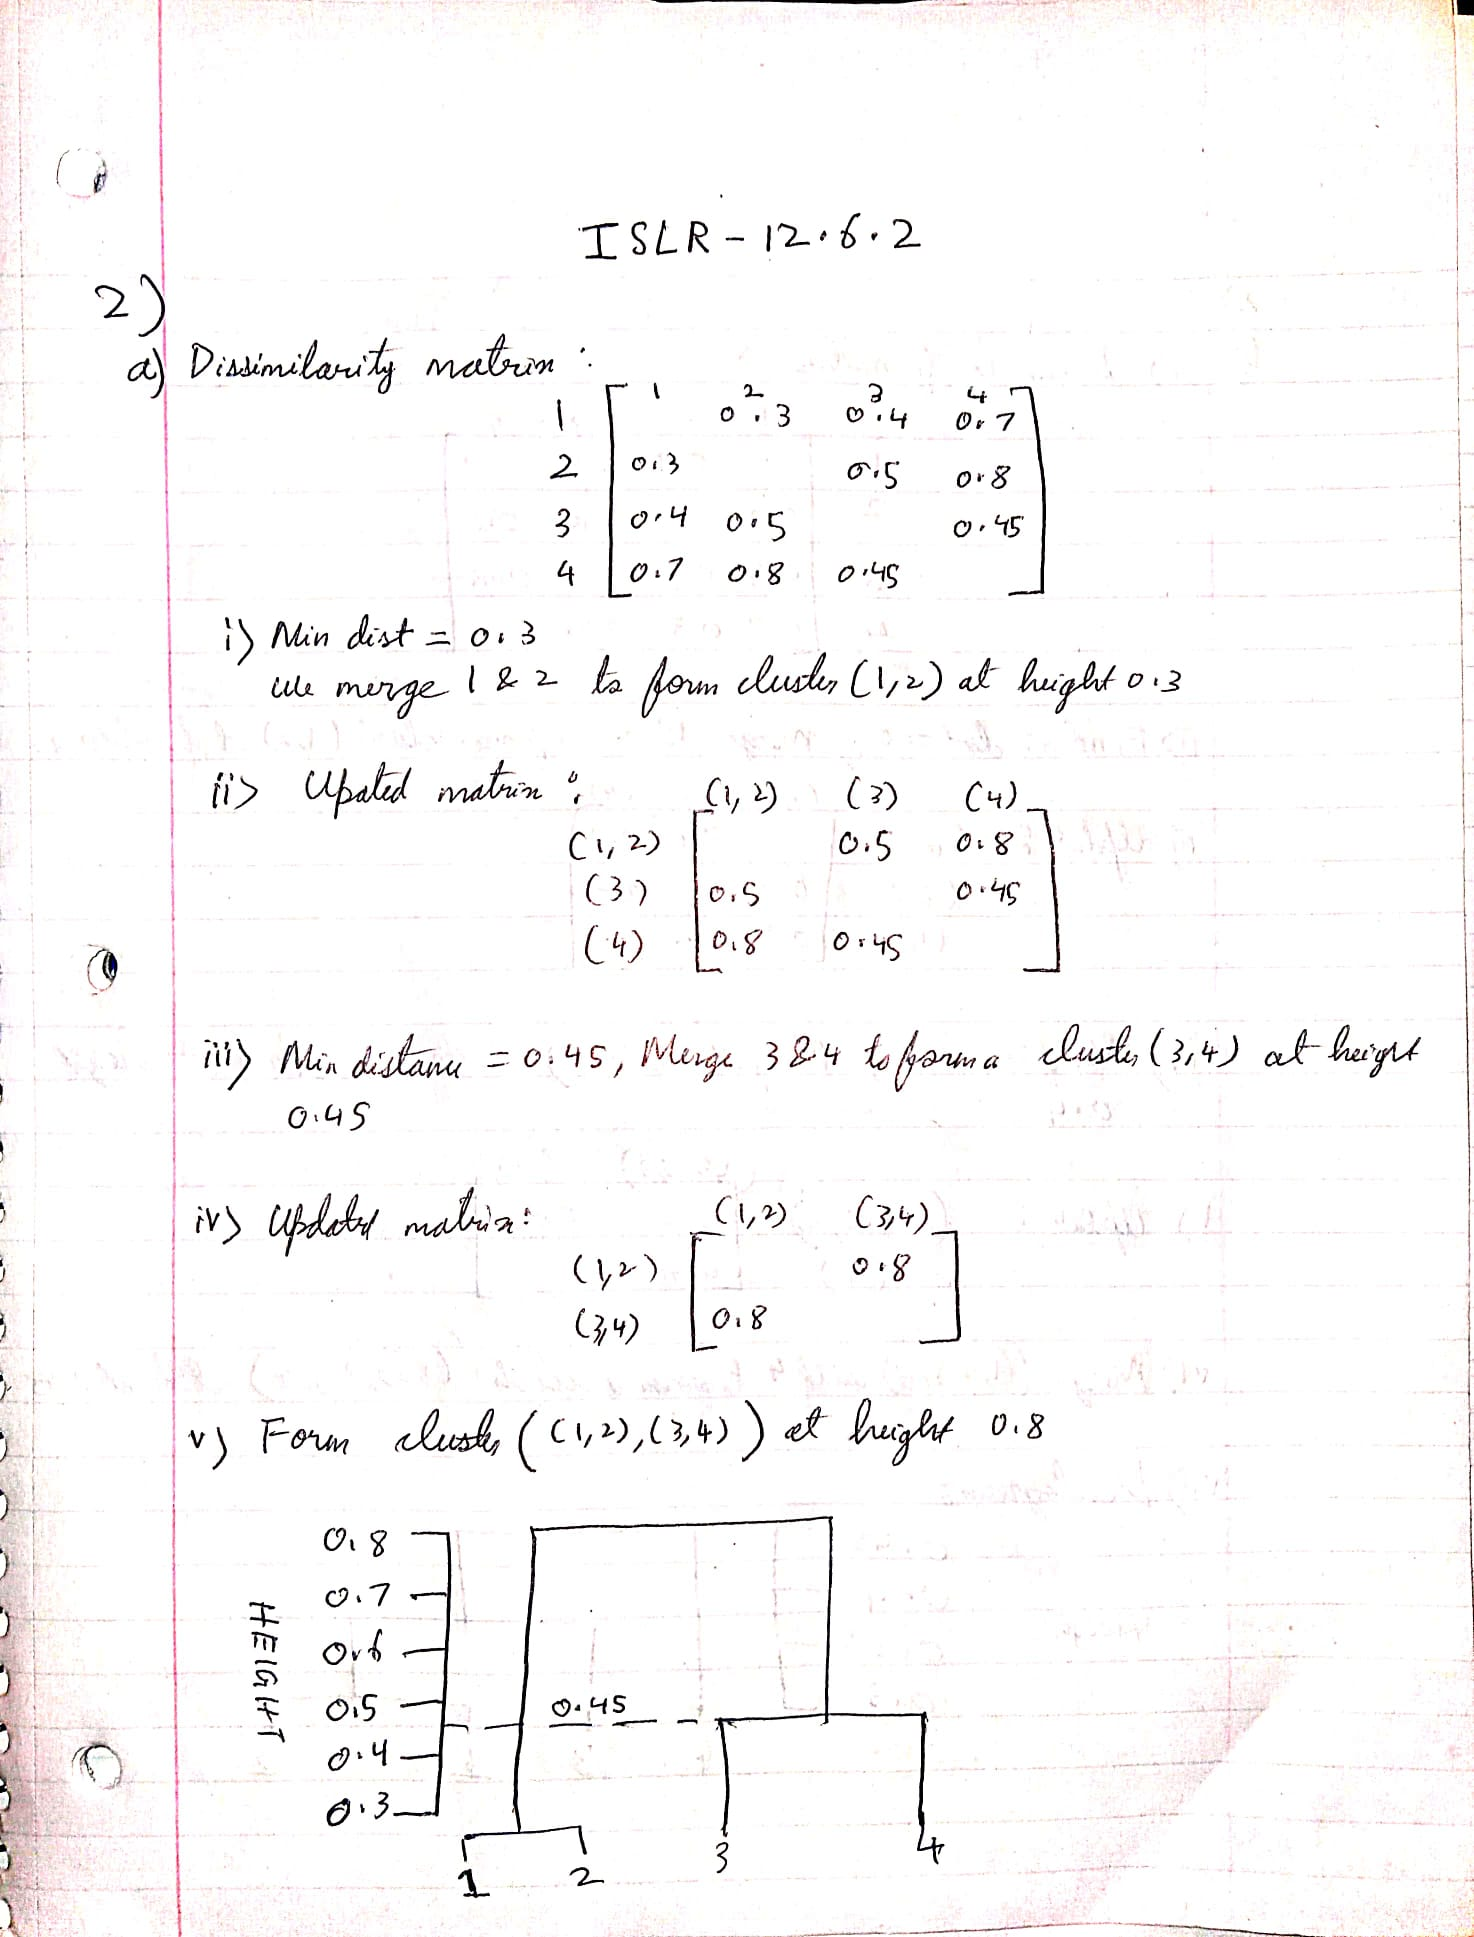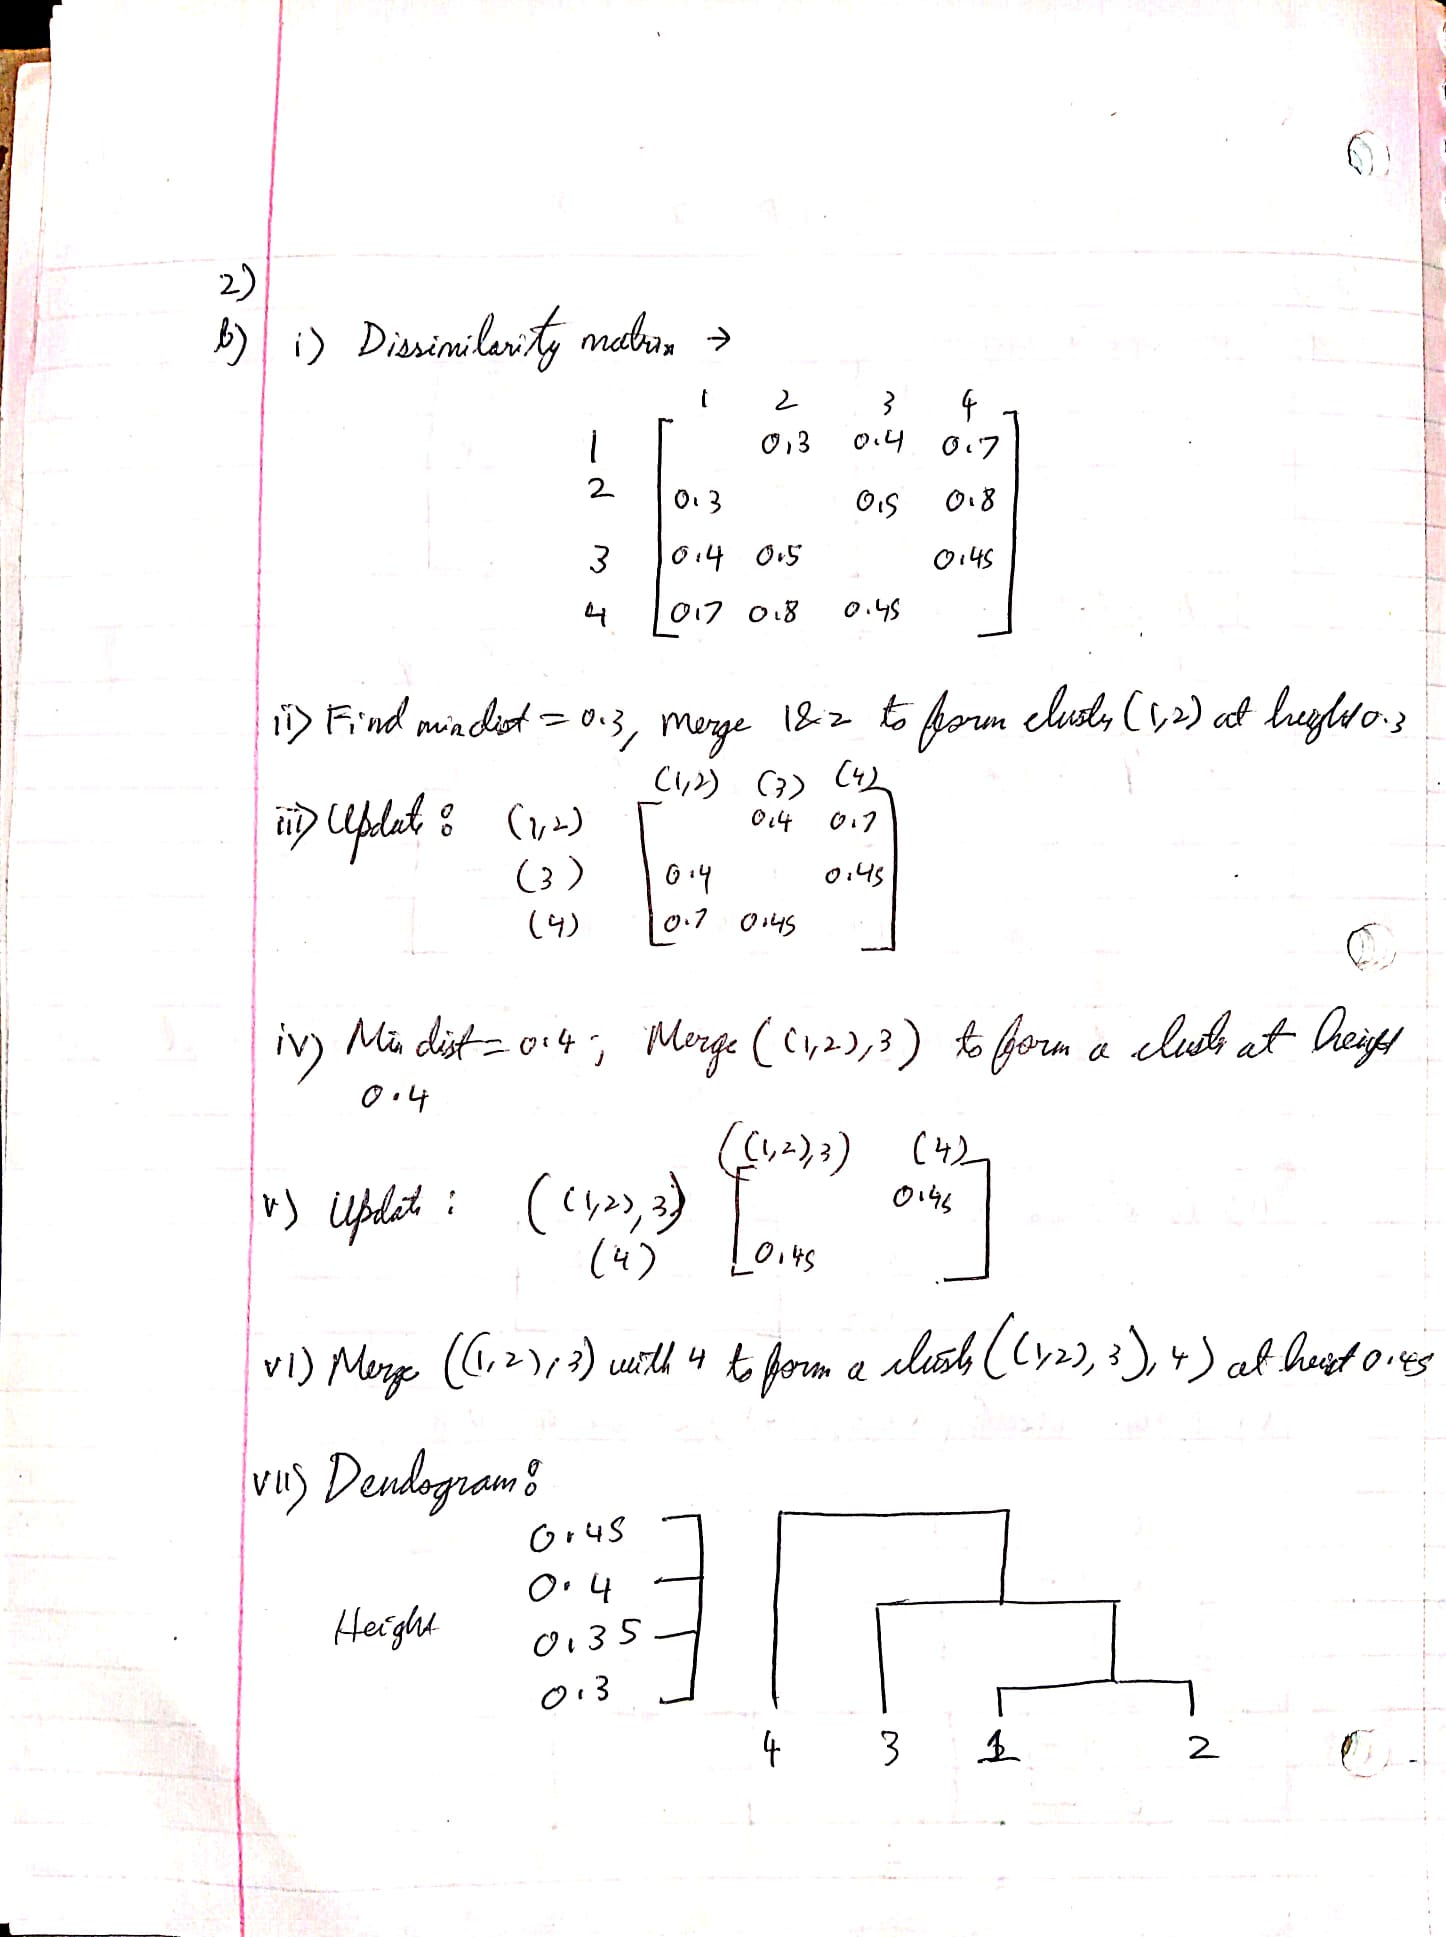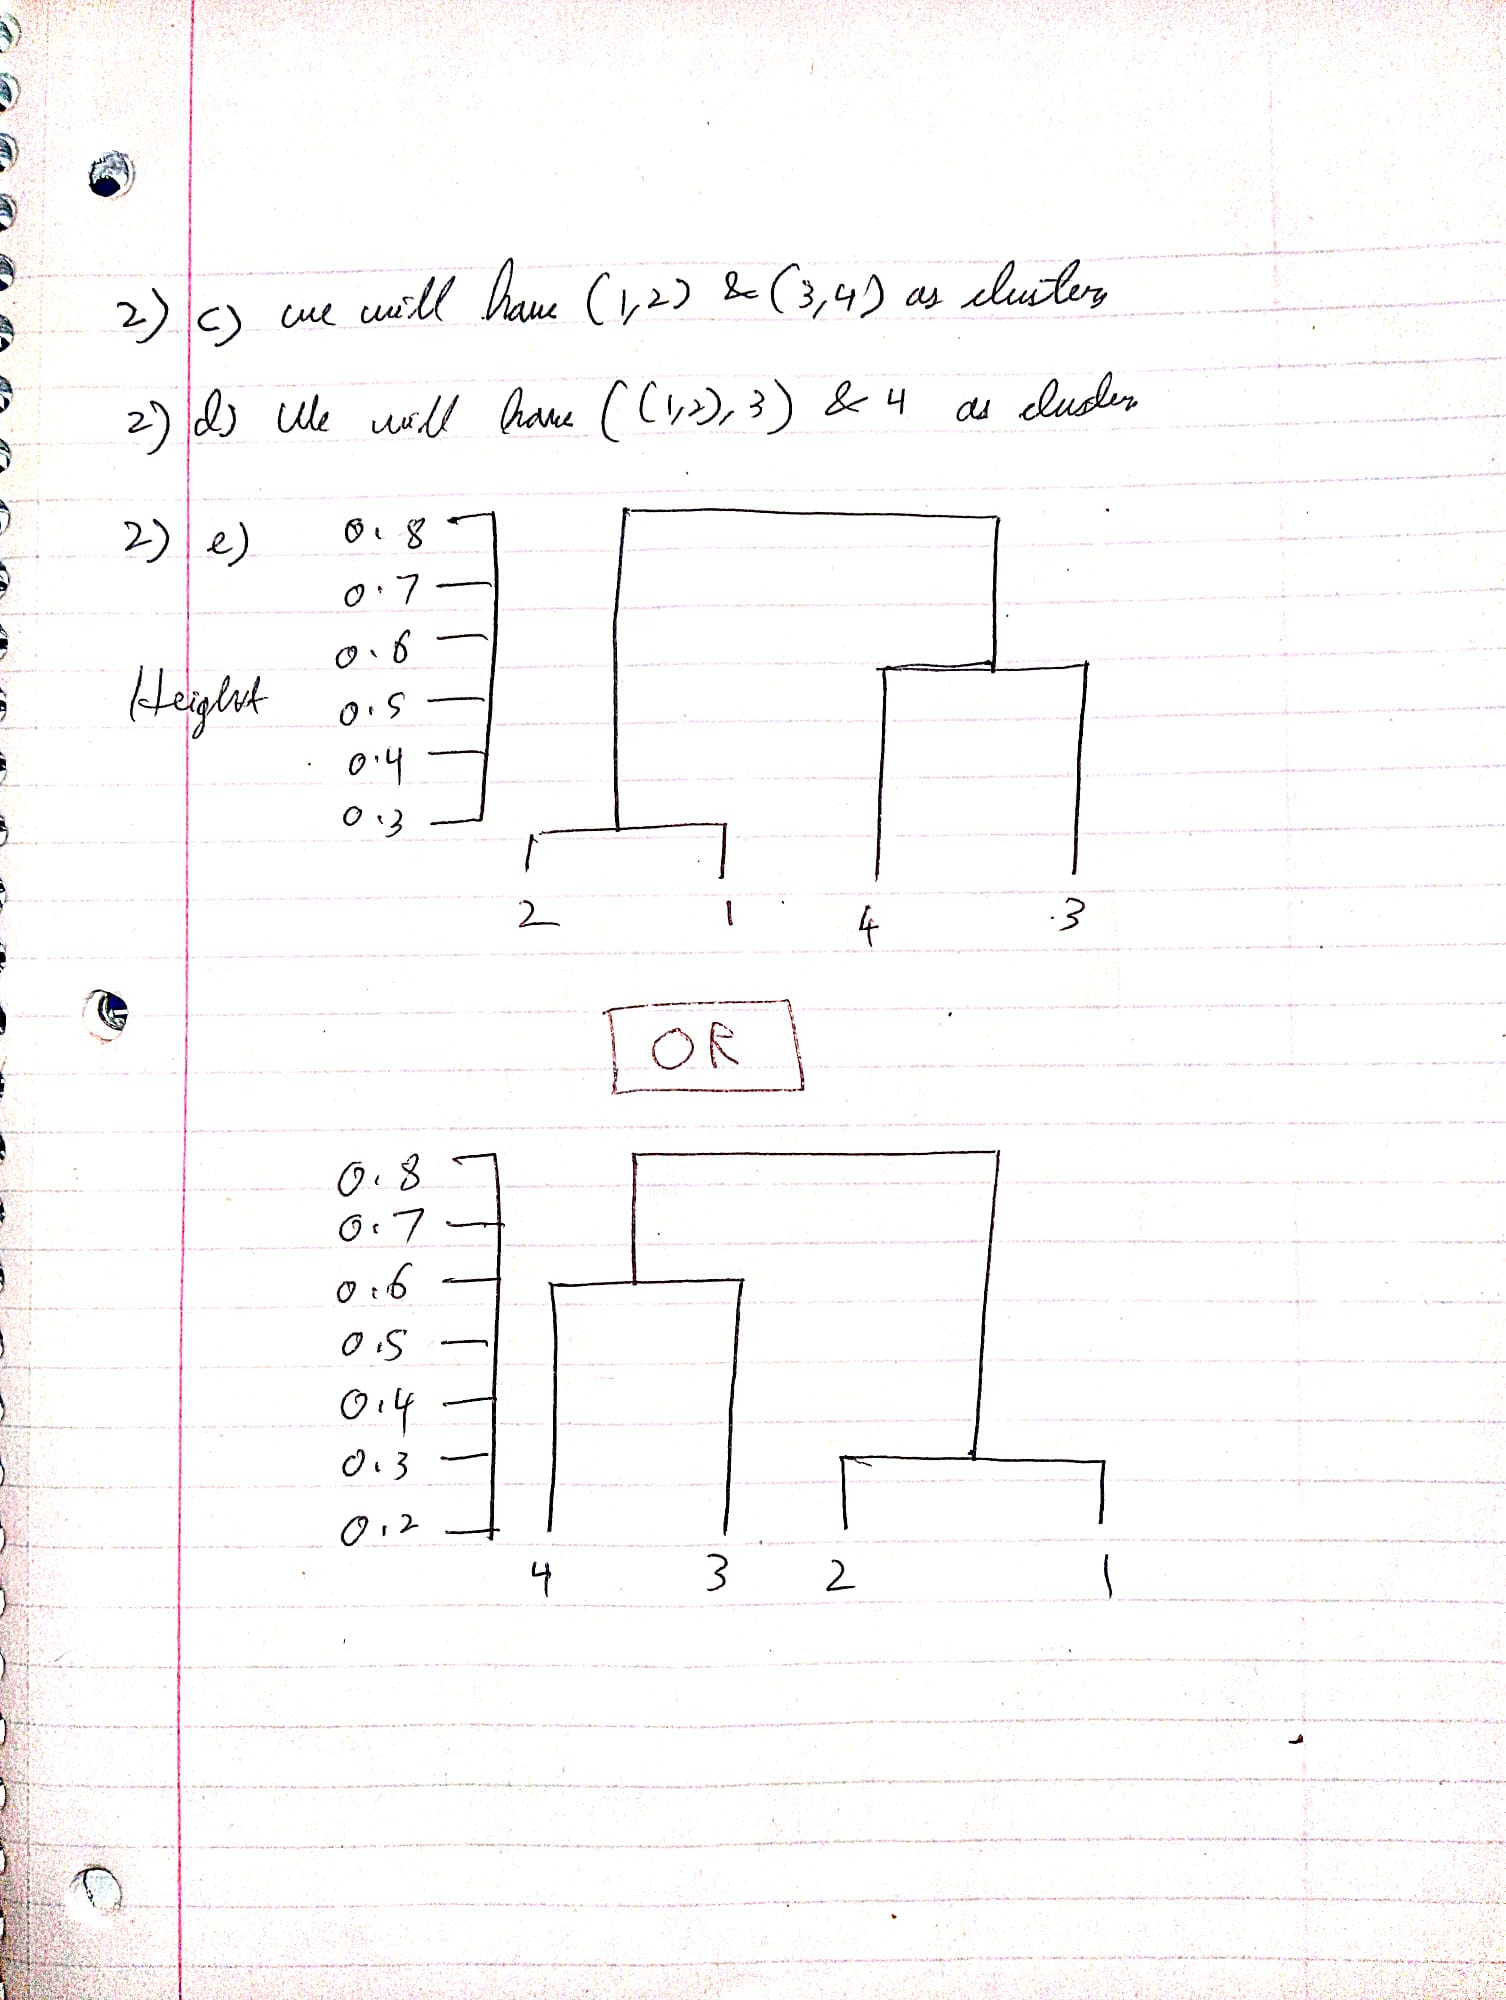